In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

### Prepare data and define classification functions

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def train_rf(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['entropy', 'log_loss', 'gini']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

    # explainer = shap.TreeExplainer(rfc)
    # shap_values = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values, X_test, class_names=rfc.classes_)
    # print(rfc.classes_[0])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 0], X_test)
    # print(rfc.classes_[1])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 1], X_test)
    # print(rfc.classes_[2])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 2], X_test)

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances[:5])

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

def train_gradient_boosted(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['squared_error', 'friedman_mse']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = GradientBoostingClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = GradientBoostingClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances[:5])

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def train_knn(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [5, 10, 20, 50]
    criterion = ['uniform', 'distance']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = KNeighborsClassifier(n_neighbors=n_est, weights=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test.values)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = KNeighborsClassifier(n_neighbors=best_params_est, weights=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test.values)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

In [5]:
data = pd.read_csv('../../0_data/1_intermediate_ML/selected_features_one_hot_complexity_16_2layers_categorical_demanding_crash.csv')
data.columns

Index(['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count', 'image_id', 'weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', 'speed', 'speed_std', 'speed_mean', 'lon_acceleration_mean',
       'lon_acceleration_std', 'lon_acceleration_max', 'lon_acceleration_min',
       'crash_likelihood', 'speed_deviation', 'speed_deviation_normalized'],
 

In [6]:
features = {
    'oneformer': ['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count'],
    'semantic': ['weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide'],
    'complexity': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15'],
    'driving': ['speed', 'speed_std', 'speed_mean',
       'lon_acceleration_mean', 'lon_acceleration_std', 'lon_acceleration_max',
       'lon_acceleration_min', 'speed_deviation',
       'speed_deviation_normalized']
}

In [7]:
del data['image_id']

### Complexity

n_estimators: 200
Criteria: gini
[[711 113 129]
 [146 661  92]
 [260 108 327]]
              precision    recall  f1-score   support

        High       0.64      0.75      0.69       953
         Low       0.75      0.74      0.74       899
      Medium       0.60      0.47      0.53       695

    accuracy                           0.67      2547
   macro avg       0.66      0.65      0.65      2547
weighted avg       0.67      0.67      0.66      2547

    importance
13    0.103260
14    0.101317
0     0.099101
8     0.098874
6     0.095665


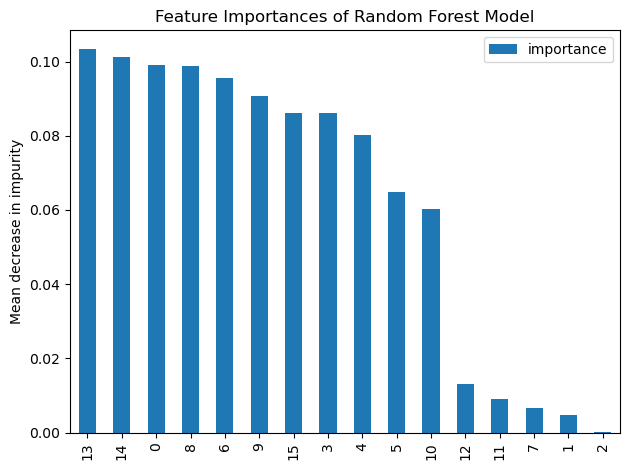

In [8]:
train_rf(data[features['complexity'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[680 177  96]
 [239 591  69]
 [356 166 173]]
              precision    recall  f1-score   support

        High       0.53      0.71      0.61       953
         Low       0.63      0.66      0.64       899
      Medium       0.51      0.25      0.33       695

    accuracy                           0.57      2547
   macro avg       0.56      0.54      0.53      2547
weighted avg       0.56      0.57      0.55      2547

    importance
13    0.123820
14    0.121708
0     0.118343
8     0.116274
6     0.085204


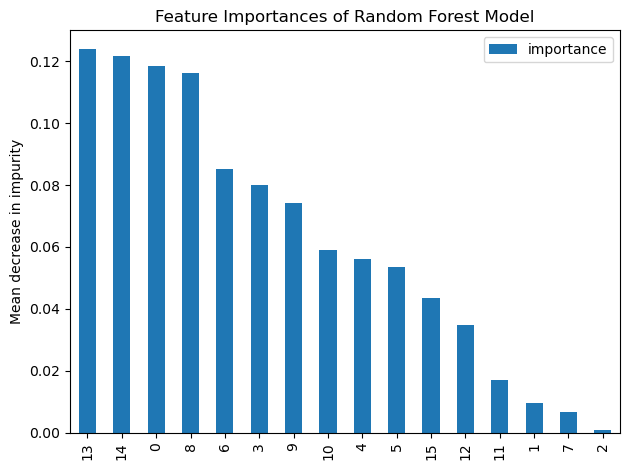

In [9]:
train_gradient_boosted(data[features['complexity'] + ['crash_likelihood']])

In [10]:
train_knn(data[features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[659 128 166]
 [138 658 103]
 [209 109 377]]
              precision    recall  f1-score   support

        High       0.66      0.69      0.67       953
         Low       0.74      0.73      0.73       899
      Medium       0.58      0.54      0.56       695

    accuracy                           0.67      2547
   macro avg       0.66      0.66      0.66      2547
weighted avg       0.66      0.67      0.66      2547



### Oneformer + semantic

n_estimators: 200
Criteria: entropy
[[777  78  98]
 [ 58 784  57]
 [158 115 422]]
              precision    recall  f1-score   support

        High       0.78      0.82      0.80       953
         Low       0.80      0.87      0.84       899
      Medium       0.73      0.61      0.66       695

    accuracy                           0.78      2547
   macro avg       0.77      0.76      0.77      2547
weighted avg       0.78      0.78      0.77      2547

                     importance
vegetation             0.129400
lead_car_vegetation    0.116773
sky                    0.086444
lead_car_sky           0.083979
lead_car_road          0.072364


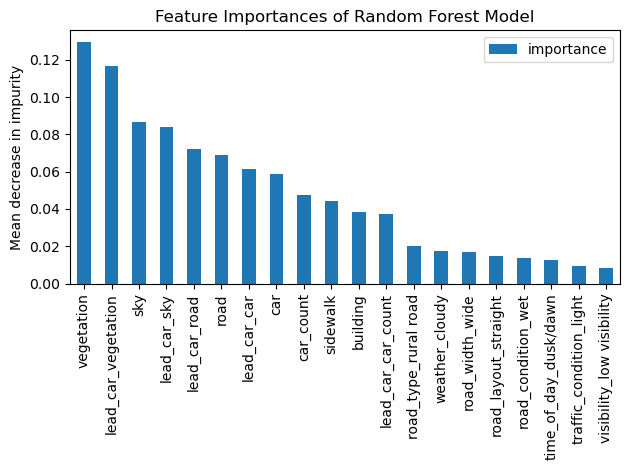

In [11]:
train_rf(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[714  86 153]
 [ 64 721 114]
 [203 155 337]]
              precision    recall  f1-score   support

        High       0.73      0.75      0.74       953
         Low       0.75      0.80      0.77       899
      Medium       0.56      0.48      0.52       695

    accuracy                           0.70      2547
   macro avg       0.68      0.68      0.68      2547
weighted avg       0.69      0.70      0.69      2547

                      importance
lead_car_vegetation     0.310394
vegetation              0.181558
lead_car_sky            0.055316
car_count               0.042385
road_type_rural road    0.039864


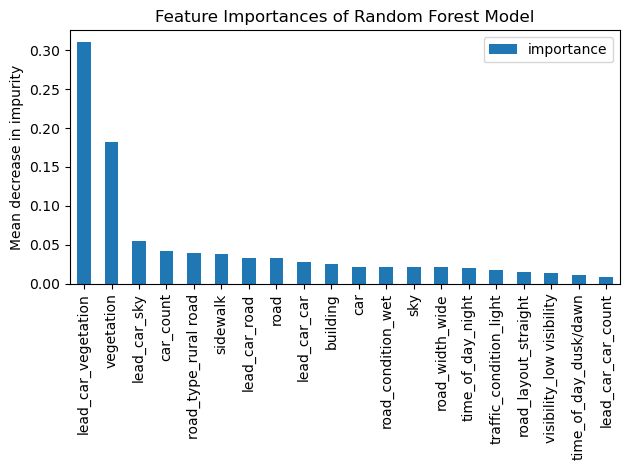

In [12]:
train_gradient_boosted(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

In [13]:
train_knn(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[711  70 172]
 [ 75 729  95]
 [165 127 403]]
              precision    recall  f1-score   support

        High       0.75      0.75      0.75       953
         Low       0.79      0.81      0.80       899
      Medium       0.60      0.58      0.59       695

    accuracy                           0.72      2547
   macro avg       0.71      0.71      0.71      2547
weighted avg       0.72      0.72      0.72      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + semantic + complexity

n_estimators: 200
Criteria: gini
[[845  64  44]
 [ 35 816  48]
 [144  62 489]]
              precision    recall  f1-score   support

        High       0.83      0.89      0.85       953
         Low       0.87      0.91      0.89       899
      Medium       0.84      0.70      0.77       695

    accuracy                           0.84      2547
   macro avg       0.84      0.83      0.84      2547
weighted avg       0.84      0.84      0.84      2547

                     importance
vegetation             0.077884
lead_car_vegetation    0.074324
sky                    0.037045
lead_car_sky           0.035835
lead_car_road          0.025378


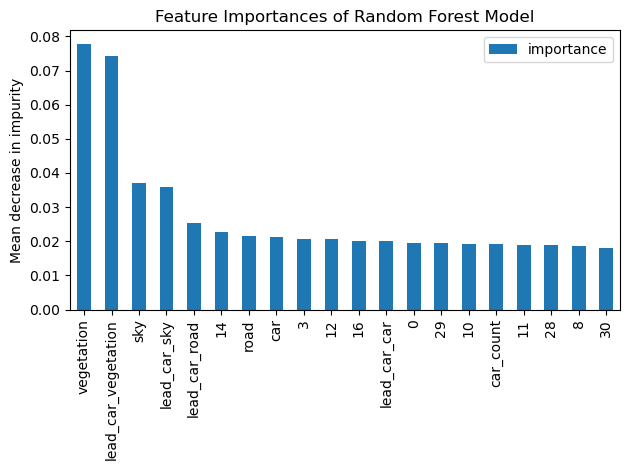

In [14]:
train_rf(data[features['oneformer'] + features['semantic'] + features['complexity'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[756  67 130]
 [ 63 751  85]
 [196 107 392]]
              precision    recall  f1-score   support

        High       0.74      0.79      0.77       953
         Low       0.81      0.84      0.82       899
      Medium       0.65      0.56      0.60       695

    accuracy                           0.75      2547
   macro avg       0.73      0.73      0.73      2547
weighted avg       0.74      0.75      0.74      2547

                      importance
lead_car_vegetation     0.244358
vegetation              0.137284
road_type_rural road    0.034254
lead_car_sky            0.030383
car_count               0.028615


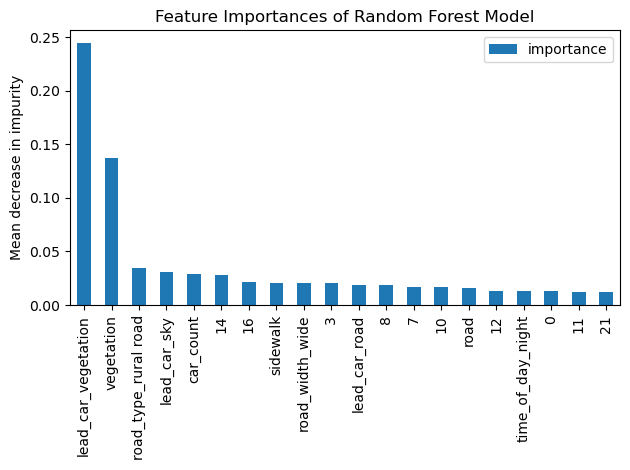

In [15]:
train_gradient_boosted(data[features['oneformer'] + features['semantic'] + features['complexity'] + ['crash_likelihood']])

In [16]:
train_knn(data[features['oneformer'] + features['semantic'] + features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[757  64 132]
 [ 61 777  61]
 [118  85 492]]
              precision    recall  f1-score   support

        High       0.81      0.79      0.80       953
         Low       0.84      0.86      0.85       899
      Medium       0.72      0.71      0.71       695

    accuracy                           0.80      2547
   macro avg       0.79      0.79      0.79      2547
weighted avg       0.79      0.80      0.80      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + complexity

n_estimators: 200
Criteria: entropy
[[819  76  58]
 [ 43 814  42]
 [154  89 452]]
              precision    recall  f1-score   support

        High       0.81      0.86      0.83       953
         Low       0.83      0.91      0.87       899
      Medium       0.82      0.65      0.72       695

    accuracy                           0.82      2547
   macro avg       0.82      0.81      0.81      2547
weighted avg       0.82      0.82      0.82      2547

                     importance
lead_car_vegetation    0.077135
vegetation             0.076175
lead_car_sky           0.041038
sky                    0.040433
lead_car_road          0.027471


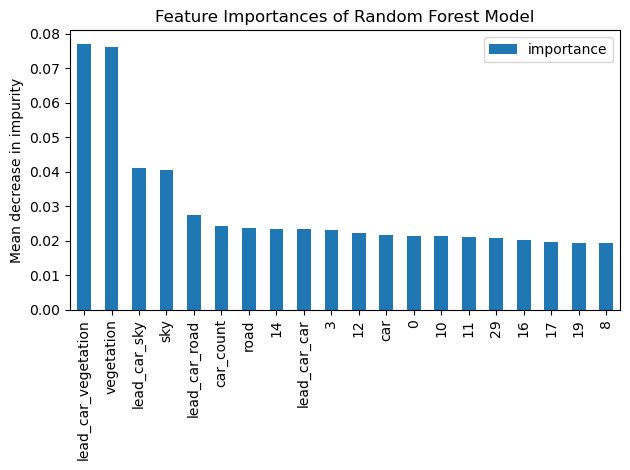

In [17]:
train_rf(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

n_estimators: 200
Criteria: friedman_mse
[[723  98 132]
 [ 78 727  94]
 [195 142 358]]
              precision    recall  f1-score   support

        High       0.73      0.76      0.74       953
         Low       0.75      0.81      0.78       899
      Medium       0.61      0.52      0.56       695

    accuracy                           0.71      2547
   macro avg       0.70      0.69      0.69      2547
weighted avg       0.70      0.71      0.71      2547

                     importance
lead_car_vegetation    0.250134
vegetation             0.151410
car_count              0.037079
lead_car_sky           0.028920
sidewalk               0.028678


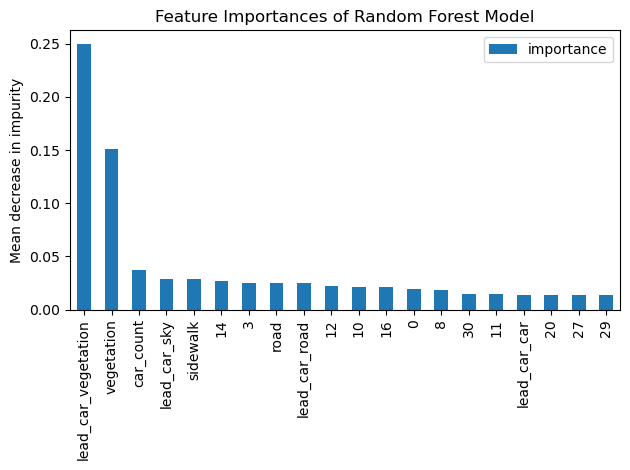

In [18]:
train_gradient_boosted(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

In [19]:
train_knn(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


n_estimators: 50
Criteria: distance
[[684 103 166]
 [ 77 738  84]
 [155 129 411]]
              precision    recall  f1-score   support

        High       0.75      0.72      0.73       953
         Low       0.76      0.82      0.79       899
      Medium       0.62      0.59      0.61       695

    accuracy                           0.72      2547
   macro avg       0.71      0.71      0.71      2547
weighted avg       0.72      0.72      0.72      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### semantic + complexity

n_estimators: 200
Criteria: entropy
[[859  21  73]
 [ 77 780  42]
 [164  60 471]]
              precision    recall  f1-score   support

        High       0.78      0.90      0.84       953
         Low       0.91      0.87      0.89       899
      Medium       0.80      0.68      0.74       695

    accuracy                           0.83      2547
   macro avg       0.83      0.82      0.82      2547
weighted avg       0.83      0.83      0.83      2547

    importance
0     0.034629
17    0.033878
14    0.033278
12    0.033217
3     0.032872


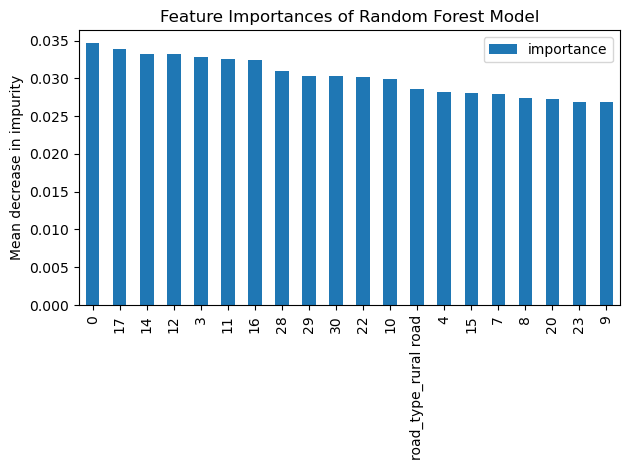

In [20]:
train_rf(data[features['complexity'] + features['semantic'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[765  67 121]
 [140 685  74]
 [238 109 348]]
              precision    recall  f1-score   support

        High       0.67      0.80      0.73       953
         Low       0.80      0.76      0.78       899
      Medium       0.64      0.50      0.56       695

    accuracy                           0.71      2547
   macro avg       0.70      0.69      0.69      2547
weighted avg       0.71      0.71      0.70      2547

                      importance
road_type_rural road    0.103120
16                      0.051763
0                       0.046791
22                      0.043859
7                       0.039411


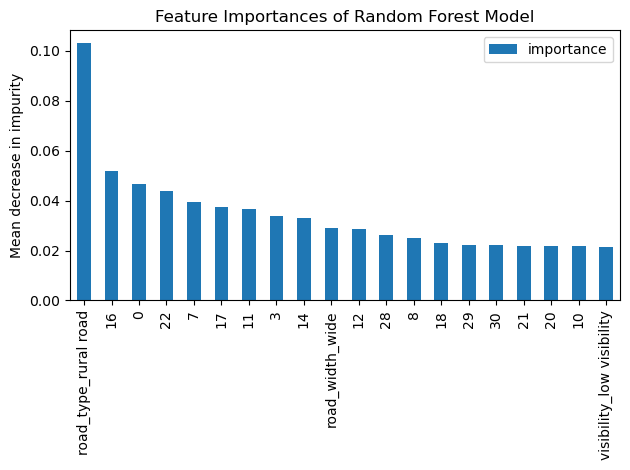

In [21]:
train_gradient_boosted(data[features['complexity'] + features['semantic'] + ['crash_likelihood']])

In [23]:
train_knn(data[features['complexity'] + features['semantic'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[846  25  82]
 [ 32 810  57]
 [ 87  45 563]]
              precision    recall  f1-score   support

        High       0.88      0.89      0.88       953
         Low       0.92      0.90      0.91       899
      Medium       0.80      0.81      0.81       695

    accuracy                           0.87      2547
   macro avg       0.87      0.87      0.87      2547
weighted avg       0.87      0.87      0.87      2547



### All features

n_estimators: 200
Criteria: entropy
[[866  47  40]
 [ 28 834  37]
 [ 94  59 542]]
              precision    recall  f1-score   support

        High       0.88      0.91      0.89       953
         Low       0.89      0.93      0.91       899
      Medium       0.88      0.78      0.82       695

    accuracy                           0.88      2547
   macro avg       0.88      0.87      0.87      2547
weighted avg       0.88      0.88      0.88      2547

                     importance
lead_car_vegetation    0.084016
vegetation             0.072283
lead_car_sky           0.044169
speed_mean             0.043622
speed                  0.043482


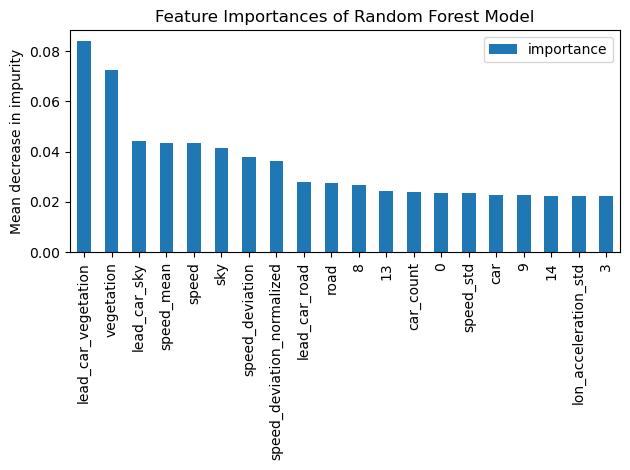

In [11]:
train_rf(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[788  56 109]
 [ 44 772  83]
 [173 107 415]]
              precision    recall  f1-score   support

        High       0.78      0.83      0.80       953
         Low       0.83      0.86      0.84       899
      Medium       0.68      0.60      0.64       695

    accuracy                           0.78      2547
   macro avg       0.76      0.76      0.76      2547
weighted avg       0.77      0.78      0.77      2547

                     importance
lead_car_vegetation    0.247904
vegetation             0.114649
speed_mean             0.054363
speed                  0.047352
speed_deviation        0.044048


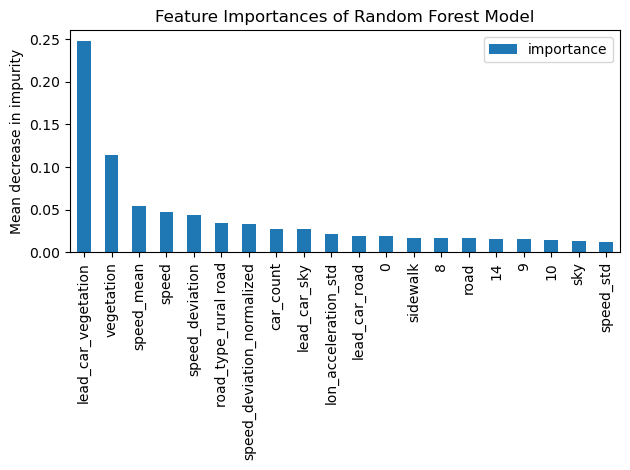

In [12]:
train_gradient_boosted(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

In [13]:
train_knn(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[785  64 104]
 [ 40 796  63]
 [105  64 526]]
              precision    recall  f1-score   support

        High       0.84      0.82      0.83       953
         Low       0.86      0.89      0.87       899
      Medium       0.76      0.76      0.76       695

    accuracy                           0.83      2547
   macro avg       0.82      0.82      0.82      2547
weighted avg       0.83      0.83      0.83      2547



### Oneformer

n_estimators: 200
Criteria: entropy
[[726 116 111]
 [ 90 751  58]
 [194 173 328]]
              precision    recall  f1-score   support

        High       0.72      0.76      0.74       953
         Low       0.72      0.84      0.77       899
      Medium       0.66      0.47      0.55       695

    accuracy                           0.71      2547
   macro avg       0.70      0.69      0.69      2547
weighted avg       0.70      0.71      0.70      2547

                     importance
lead_car_vegetation    0.147121
vegetation             0.145767
sky                    0.098683
lead_car_sky           0.098308
lead_car_road          0.089942


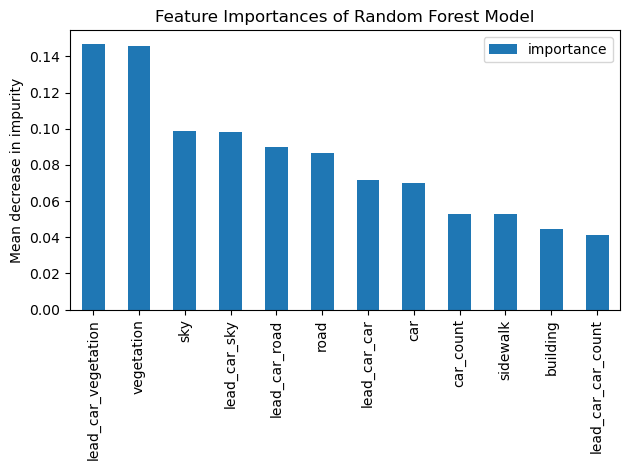

In [27]:
train_rf(data[features['oneformer'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[659 137 157]
 [101 695 103]
 [222 183 290]]
              precision    recall  f1-score   support

        High       0.67      0.69      0.68       953
         Low       0.68      0.77      0.73       899
      Medium       0.53      0.42      0.47       695

    accuracy                           0.65      2547
   macro avg       0.63      0.63      0.62      2547
weighted avg       0.64      0.65      0.64      2547

                     importance
lead_car_vegetation    0.368518
vegetation             0.207312
lead_car_sky           0.062288
car_count              0.060648
road                   0.054444


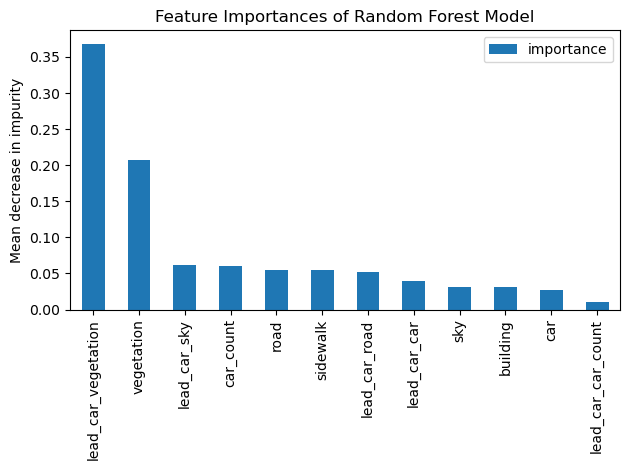

In [28]:
train_gradient_boosted(data[features['oneformer'] + ['crash_likelihood']])

In [29]:
train_knn(data[features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[624 151 178]
 [ 99 689 111]
 [200 211 284]]
              precision    recall  f1-score   support

        High       0.68      0.65      0.67       953
         Low       0.66      0.77      0.71       899
      Medium       0.50      0.41      0.45       695

    accuracy                           0.63      2547
   macro avg       0.61      0.61      0.61      2547
weighted avg       0.62      0.63      0.62      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Semantic

n_estimators: 200
Criteria: entropy
[[807  95  51]
 [340 520  39]
 [449 128 118]]
              precision    recall  f1-score   support

        High       0.51      0.85      0.63       953
         Low       0.70      0.58      0.63       899
      Medium       0.57      0.17      0.26       695

    accuracy                           0.57      2547
   macro avg       0.59      0.53      0.51      2547
weighted avg       0.59      0.57      0.53      2547

                       importance
road_type_rural road     0.136251
road_width_wide          0.102273
time_of_day_dusk/dawn    0.092518
road_condition_wet       0.089753
road_layout_straight     0.089252


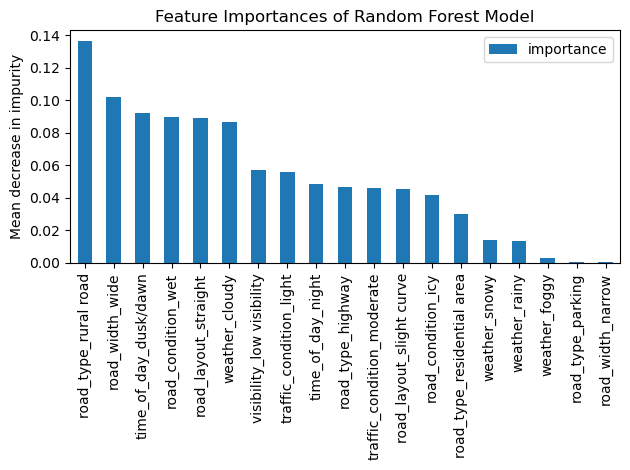

In [30]:
train_rf(data[features['semantic'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[825  92  36]
 [380 491  28]
 [472 129  94]]
              precision    recall  f1-score   support

        High       0.49      0.87      0.63       953
         Low       0.69      0.55      0.61       899
      Medium       0.59      0.14      0.22       695

    accuracy                           0.55      2547
   macro avg       0.59      0.52      0.49      2547
weighted avg       0.59      0.55      0.51      2547

                           importance
road_type_rural road         0.262733
road_width_wide              0.090683
road_condition_wet           0.078237
visibility_low visibility    0.073166
weather_cloudy               0.072199


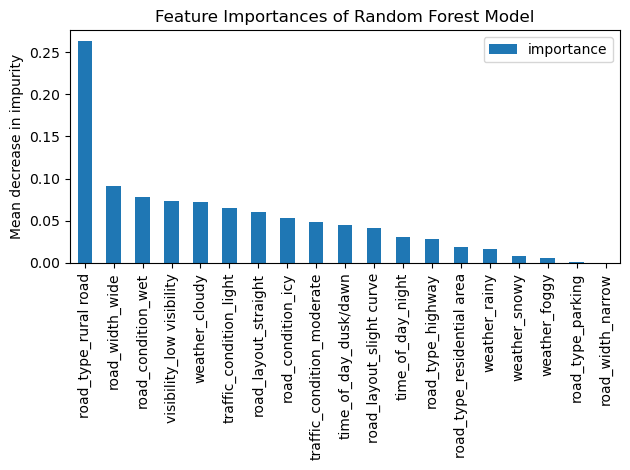

In [31]:
train_gradient_boosted(data[features['semantic'] + ['crash_likelihood']])

In [32]:
train_knn(data[features['semantic'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[663 239  51]
 [236 624  39]
 [334 243 118]]
              precision    recall  f1-score   support

        High       0.54      0.70      0.61       953
         Low       0.56      0.69      0.62       899
      Medium       0.57      0.17      0.26       695

    accuracy                           0.55      2547
   macro avg       0.56      0.52      0.50      2547
weighted avg       0.56      0.55      0.52      2547



### Driving

n_estimators: 200
Criteria: gini
[[679 134 140]
 [141 616 142]
 [214 148 333]]
              precision    recall  f1-score   support

        High       0.66      0.71      0.68       953
         Low       0.69      0.69      0.69       899
      Medium       0.54      0.48      0.51       695

    accuracy                           0.64      2547
   macro avg       0.63      0.63      0.63      2547
weighted avg       0.64      0.64      0.64      2547

                            importance
speed_mean                    0.148928
speed                         0.134165
speed_deviation               0.130733
speed_deviation_normalized    0.130321
speed_std                     0.114721


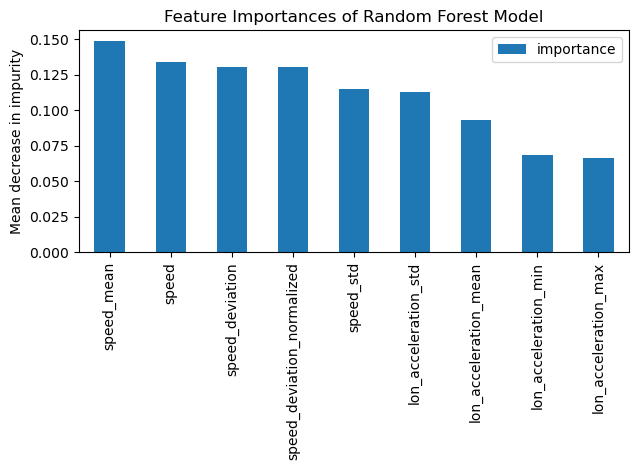

In [33]:
train_rf(data[features['driving'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[621 174 158]
 [182 567 150]
 [219 183 293]]
              precision    recall  f1-score   support

        High       0.61      0.65      0.63       953
         Low       0.61      0.63      0.62       899
      Medium       0.49      0.42      0.45       695

    accuracy                           0.58      2547
   macro avg       0.57      0.57      0.57      2547
weighted avg       0.58      0.58      0.58      2547

                            importance
speed_deviation               0.201549
speed_mean                    0.186401
speed                         0.169355
speed_deviation_normalized    0.165730
lon_acceleration_std          0.087318


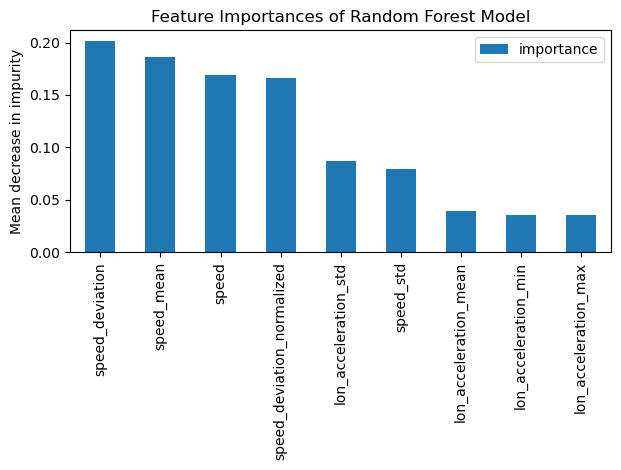

In [34]:
train_gradient_boosted(data[features['driving'] + ['crash_likelihood']])

In [35]:
train_knn(data[features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[640 170 143]
 [161 580 158]
 [219 170 306]]
              precision    recall  f1-score   support

        High       0.63      0.67      0.65       953
         Low       0.63      0.65      0.64       899
      Medium       0.50      0.44      0.47       695

    accuracy                           0.60      2547
   macro avg       0.59      0.59      0.59      2547
weighted avg       0.59      0.60      0.60      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + driving

n_estimators: 200
Criteria: entropy
[[828  60  65]
 [ 50 797  52]
 [141  91 463]]
              precision    recall  f1-score   support

        High       0.81      0.87      0.84       953
         Low       0.84      0.89      0.86       899
      Medium       0.80      0.67      0.73       695

    accuracy                           0.82      2547
   macro avg       0.82      0.81      0.81      2547
weighted avg       0.82      0.82      0.82      2547

                     importance
lead_car_vegetation    0.102736
vegetation             0.100663
speed_mean             0.062162
sky                    0.060994
speed                  0.060565


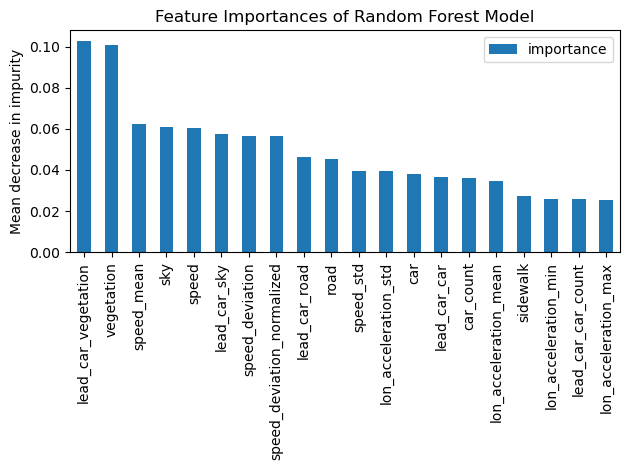

In [36]:
train_rf(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[717  91 145]
 [ 65 725 109]
 [192 140 363]]
              precision    recall  f1-score   support

        High       0.74      0.75      0.74       953
         Low       0.76      0.81      0.78       899
      Medium       0.59      0.52      0.55       695

    accuracy                           0.71      2547
   macro avg       0.69      0.69      0.69      2547
weighted avg       0.70      0.71      0.71      2547

                     importance
lead_car_vegetation    0.278030
vegetation             0.148092
speed_deviation        0.072250
speed_mean             0.065770
speed                  0.052407


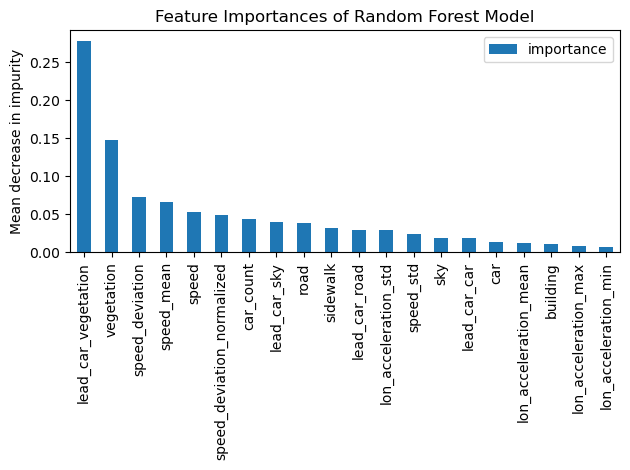

In [37]:
train_gradient_boosted(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])

In [38]:
train_knn(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[684 119 150]
 [ 81 704 114]
 [167 128 400]]
              precision    recall  f1-score   support

        High       0.73      0.72      0.73       953
         Low       0.74      0.78      0.76       899
      Medium       0.60      0.58      0.59       695

    accuracy                           0.70      2547
   macro avg       0.69      0.69      0.69      2547
weighted avg       0.70      0.70      0.70      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Semantic + driving

n_estimators: 200
Criteria: gini
[[838  37  78]
 [ 48 762  89]
 [124  60 511]]
              precision    recall  f1-score   support

        High       0.83      0.88      0.85       953
         Low       0.89      0.85      0.87       899
      Medium       0.75      0.74      0.74       695

    accuracy                           0.83      2547
   macro avg       0.82      0.82      0.82      2547
weighted avg       0.83      0.83      0.83      2547

                            importance
speed_mean                    0.119594
speed                         0.119051
speed_deviation_normalized    0.108986
speed_deviation               0.104069
speed_std                     0.075980


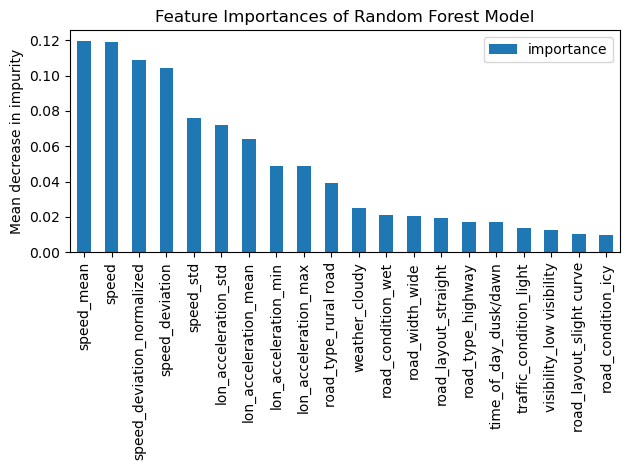

In [39]:
train_rf(data[features['semantic'] + features['driving'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[728  75 150]
 [ 92 673 134]
 [194 108 393]]
              precision    recall  f1-score   support

        High       0.72      0.76      0.74       953
         Low       0.79      0.75      0.77       899
      Medium       0.58      0.57      0.57       695

    accuracy                           0.70      2547
   macro avg       0.69      0.69      0.69      2547
weighted avg       0.70      0.70      0.70      2547

                            importance
speed_mean                    0.165534
speed                         0.143491
speed_deviation               0.126499
road_type_rural road          0.097769
speed_deviation_normalized    0.073460


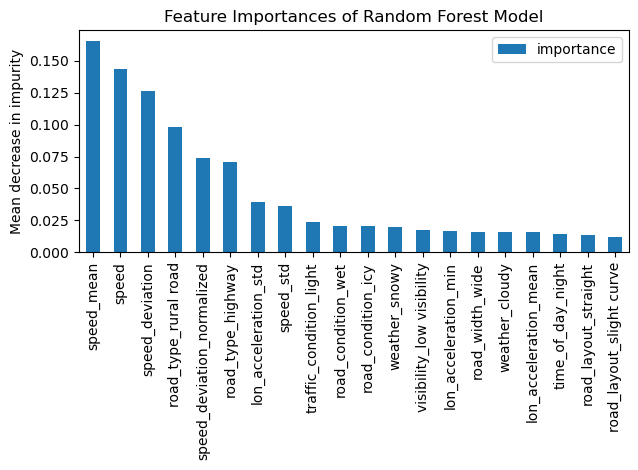

In [40]:
train_gradient_boosted(data[features['semantic'] + features['driving'] + ['crash_likelihood']])

In [41]:
train_knn(data[features['semantic'] + features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[772  60 121]
 [ 69 733  97]
 [148  74 473]]
              precision    recall  f1-score   support

        High       0.78      0.81      0.80       953
         Low       0.85      0.82      0.83       899
      Medium       0.68      0.68      0.68       695

    accuracy                           0.78      2547
   macro avg       0.77      0.77      0.77      2547
weighted avg       0.78      0.78      0.78      2547



### Archive

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

def train_rf(merged_df):
    random_state = 2200
    X = merged_df.drop(['final_label'], axis=1)
    y = merged_df['final_label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['gini', 'entropy', 'log_loss']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

    # explainer = shap.TreeExplainer(rfc)
    # shap_values = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values, X_test, class_names=rfc.classes_)
    # print(rfc.classes_[0])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 0], X_test)
    # print(rfc.classes_[1])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 1], X_test)
    # print(rfc.classes_[2])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 2], X_test)

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances)
    
    X = merged_df[feature_importances.index[:len(feature_importances)//2]]
    y = merged_df['final_label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

In [3]:
data = pd.read_csv('../../0_data/1_intermediate_ML/selected_features_one_hot_data.csv')
data.columns

Index(['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count', 'demanding_level', 'final_label',
       'weather_cloudy', 'weather_partly cloudy', 'weather_rainy',
       'weather_sunny', 'weather_unclear', 'traffic_condition_light',
       'traffic_condition_moderate', 'time_of_day_dusk', 'time_of_day_night',
       'road_type_highway', 'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide'],
      dtype='object')

In [4]:
features = {
    'oneformer': ['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building', 'lead_car_road', 'lead_car_vegetation', 
                  'lead_car_sky', 'lead_car_car', 'car_count', 'lead_car_car_count'],
    'semantic': ['weather_cloudy', 'weather_partly cloudy', 'weather_rainy',
                 'weather_sunny', 'weather_unclear', 'traffic_condition_light',
                 'traffic_condition_moderate', 'time_of_day_dusk', 'time_of_day_night',
                 'road_type_highway', 'road_type_parking', 'road_type_residential area',
                 'road_type_rural road', 'road_width_narrow', 'road_width_wide']
}

n_estimators: 200
Criteria: entropy
[[ 5  2  7]
 [ 0 36 12]
 [10 13 40]]
              precision    recall  f1-score   support

        High       0.33      0.36      0.34        14
         Low       0.71      0.75      0.73        48
      Medium       0.68      0.63      0.66        63

    accuracy                           0.65       125
   macro avg       0.57      0.58      0.58       125
weighted avg       0.65      0.65      0.65       125

                            importance
lead_car_car                  0.119940
car                           0.110311
lead_car_vegetation           0.108810
road                          0.084445
lead_car_sky                  0.077811
sky                           0.075888
lead_car_road                 0.074439
vegetation                    0.067393
car_count                     0.047751
lead_car_car_count            0.044739
sidewalk                      0.043414
building                      0.038141
weather_sunny                 0.016674


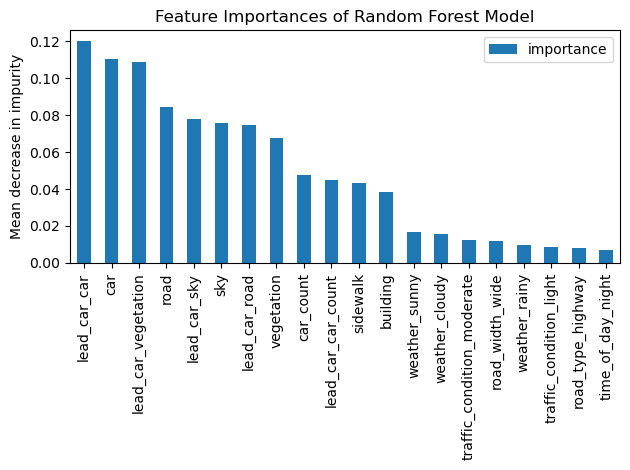

In [5]:
train_rf(data[features['oneformer'] + features['semantic'] + ['final_label']])

n_estimators: 200
Criteria: entropy
[[ 5  3  6]
 [ 0 27 21]
 [ 6 15 42]]
              precision    recall  f1-score   support

        High       0.45      0.36      0.40        14
         Low       0.60      0.56      0.58        48
      Medium       0.61      0.67      0.64        63

    accuracy                           0.59       125
   macro avg       0.55      0.53      0.54       125
weighted avg       0.59      0.59      0.59       125

                     importance
lead_car_car           0.157959
car                    0.120415
lead_car_road          0.117168
lead_car_vegetation    0.092764
road                   0.089887
vegetation             0.087124
sky                    0.077994
lead_car_sky           0.070379
car_count              0.056903
sidewalk               0.046949
lead_car_car_count     0.042681
building               0.039776
n_estimators: 200
Criteria: entropy
[[ 6  1 11]
 [ 0 27 31]
 [ 6 11 57]]
              precision    recall  f1-score   support

  

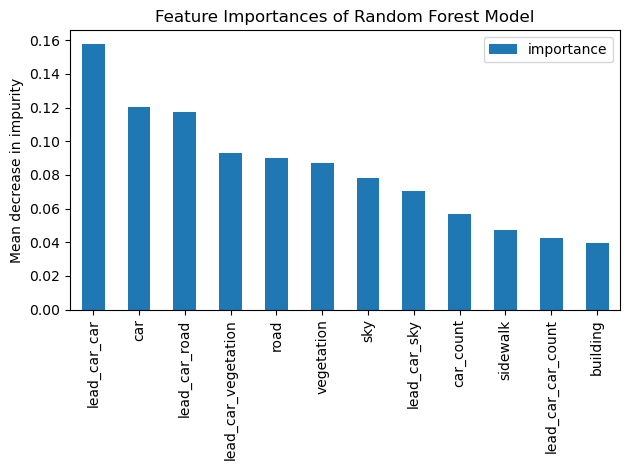

In [6]:
train_rf(data[features['oneformer'] + ['final_label']])

n_estimators: 200
Criteria: gini
[[ 6  0  8]
 [ 1 11 36]
 [ 2  9 52]]
              precision    recall  f1-score   support

        High       0.67      0.43      0.52        14
         Low       0.55      0.23      0.32        48
      Medium       0.54      0.83      0.65        63

    accuracy                           0.55       125
   macro avg       0.59      0.49      0.50       125
weighted avg       0.56      0.55      0.51       125

                            importance
weather_cloudy                0.112439
traffic_condition_light       0.108091
traffic_condition_moderate    0.102704
road_width_wide               0.087163
road_type_highway             0.084443
time_of_day_dusk              0.078289
road_type_rural road          0.077613
weather_sunny                 0.074809
road_type_residential area    0.074567
time_of_day_night             0.069138
weather_unclear               0.041588
weather_partly cloudy         0.032233
weather_rainy                 0.030606
roa

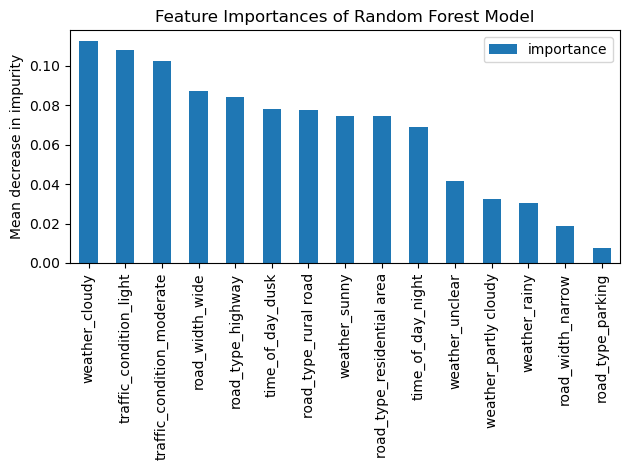

In [7]:
train_rf(data[features['semantic'] + ['final_label']])